In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [14]:
df_nopass = pd.concat([
                       pd.read_csv("results/out_nopass/faults_registers.csv")])

df_eddi_cfcss = pd.concat([
                           pd.read_csv("results/out_eddi_cfcss/faults_registers.csv")]+
                           [
                           pd.read_csv("results/out_eddi_cfcss/faults_registers_new.csv")])

df_eddi_rasm_inter = pd.concat([
                                pd.read_csv("results/out_eddi_rasm_inter/faults_registers.csv")]+
                                [
                                pd.read_csv("results/out_eddi_rasm_inter/faults_registers_new.csv")])

df_eddi_rasm = pd.concat([
                          pd.read_csv("results/out_eddi_rasm/faults_registers.csv")]+
                          [
                          pd.read_csv("results/out_eddi_rasm/faults_registers_new.csv")])

df_fdsc_cfcss = pd.concat([
                           pd.read_csv("results/out_fdsc_cfcss/faults_registers.csv")]+
                           [
                           pd.read_csv("results/out_fdsc_cfcss/faults_registers_new.csv")])

df_fdsc_rasm_inter = pd.concat([
                                pd.read_csv("results/out_fdsc_rasm_inter/faults_registers.csv")]+
                                [
                                pd.read_csv("results/out_fdsc_rasm_inter/faults_registers_new.csv")])

df_fdsc_rasm = pd.concat([
                          pd.read_csv("results/out_fdsc_rasm/faults_registers.csv")]+
                          [
                          pd.read_csv("results/out_fdsc_rasm/faults_registers_new.csv")])

df_seddi_cfcss = pd.concat([
                           pd.read_csv("results/out_seddi_cfcss/faults_registers.csv")]+
                           [
                           pd.read_csv("results/out_seddi_cfcss/faults_registers_new.csv")])

df_seddi_rasm_inter = pd.concat([
                                pd.read_csv("results/out_seddi_rasm_inter/faults_registers.csv")]+
                                [
                                pd.read_csv("results/out_seddi_rasm_inter/faults_registers_new.csv")])

df_seddi_rasm = pd.concat([
                          pd.read_csv("results/out_seddi_rasm/faults_registers.csv")]+
                          [
                          pd.read_csv("results/out_seddi_rasm/faults_registers_new.csv")])


dataframes = {"eddi_cfcss": df_eddi_cfcss,
              "eddi_rasm": df_eddi_rasm,
              "eddi_rasm_inter": df_eddi_rasm_inter,
              "fdsc_cfcss": df_fdsc_cfcss,
              "fdsc_rasm": df_fdsc_rasm,
              "fdsc_rasm_inter": df_fdsc_rasm_inter,
              "seddi_cfcss": df_seddi_cfcss,
              "seddi_rasm": df_seddi_rasm,
              "seddi_rasm_inter": df_seddi_rasm_inter
              }

dataframes["nopass"] = df_nopass

In [15]:
df_new = pd.DataFrame()

for key in dataframes:
    df = dataframes[key]
    sz_tot = df.shape[0]
    df_errcodes = df.groupby('code')
    sz_df_errcodes = df_errcodes.size()
    df_new[key] = sz_df_errcodes

In [16]:
df_new.drop(0).sum()

eddi_cfcss          1704.0
eddi_rasm           1783.0
eddi_rasm_inter     1907.0
fdsc_cfcss          1704.0
fdsc_rasm           1786.0
fdsc_rasm_inter     1936.0
seddi_cfcss         1721.0
seddi_rasm          1826.0
seddi_rasm_inter    1892.0
nopass              1272.0
dtype: float64

In [17]:
df_new.drop(0).transpose()

code,-3,-2,-1,1,2
eddi_cfcss,137.0,4.0,239.0,510.0,814.0
eddi_rasm,125.0,3.0,230.0,551.0,874.0
eddi_rasm_inter,63.0,6.0,517.0,665.0,656.0
fdsc_cfcss,183.0,4.0,292.0,240.0,985.0
fdsc_rasm,135.0,3.0,336.0,311.0,1001.0
fdsc_rasm_inter,106.0,15.0,649.0,416.0,750.0
seddi_cfcss,174.0,7.0,279.0,407.0,854.0
seddi_rasm,133.0,1.0,248.0,486.0,958.0
seddi_rasm_inter,82.0,4.0,612.0,551.0,643.0
nopass,576.0,26.0,670.0,NaN,NaN


In [18]:
df_perc = (df_new.drop(0) / df_new.drop(0).sum() * 100).transpose()
df_perc

code,-3,-2,-1,1,2
eddi_cfcss,8.039906,0.234742,14.025822,29.929577,47.769953
eddi_rasm,7.010656,0.168256,12.899607,30.902973,49.018508
eddi_rasm_inter,3.303618,0.314630,27.110645,34.871526,34.399580
fdsc_cfcss,10.739437,0.234742,17.136150,14.084507,57.805164
fdsc_rasm,7.558791,0.167973,18.812990,17.413214,56.047032
fdsc_rasm_inter,5.475207,0.774793,33.522727,21.487603,38.739669
seddi_cfcss,10.110401,0.406740,16.211505,23.649041,49.622313
seddi_rasm,7.283680,0.054765,13.581599,26.615553,52.464403
seddi_rasm_inter,4.334038,0.211416,32.346723,29.122622,33.985201
nopass,45.283019,2.044025,52.672956,NaN,NaN


In [19]:
print("Percentage of faults detected by the SIHFT mechanism, considering only effective SEUs.")
df_new.drop([0, -1, -2, -3]).sum() / df_new.drop(0).sum() * 100

Percentage of faults detected by the SIHFT mechanism, considering only effective SEUs.


eddi_cfcss          77.699531
eddi_rasm           79.921481
eddi_rasm_inter     69.271106
fdsc_cfcss          71.889671
fdsc_rasm           73.460246
fdsc_rasm_inter     60.227273
seddi_cfcss         73.271354
seddi_rasm          79.079956
seddi_rasm_inter    63.107822
nopass               0.000000
dtype: float64

In [20]:
print("Percentage of faults detected by the SIHFT+Watchdog mechanism, considering only effective SEUs.")
df_new.drop([0, -1, -2]).sum() / df_new.drop(0).sum() * 100

Percentage of faults detected by the SIHFT+Watchdog mechanism, considering only effective SEUs.


eddi_cfcss          85.739437
eddi_rasm           86.932137
eddi_rasm_inter     72.574725
fdsc_cfcss          82.629108
fdsc_rasm           81.019037
fdsc_rasm_inter     65.702479
seddi_cfcss         83.381755
seddi_rasm          86.363636
seddi_rasm_inter    67.441860
nopass              45.283019
dtype: float64

In [21]:
df_new.sum()

eddi_cfcss          11647.0
eddi_rasm           11366.0
eddi_rasm_inter     10033.0
fdsc_cfcss          13059.0
fdsc_rasm           12451.0
fdsc_rasm_inter     10723.0
seddi_cfcss         12092.0
seddi_rasm          11544.0
seddi_rasm_inter    10044.0
nopass              10000.0
dtype: float64

# Plotting the data

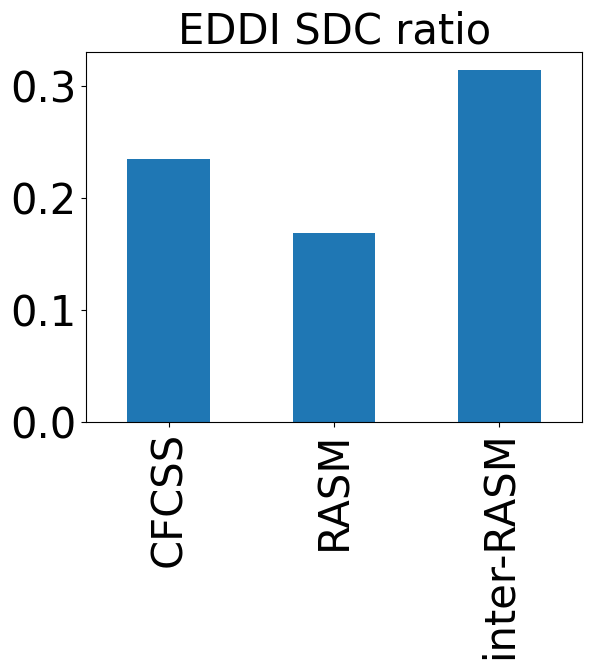

In [22]:
ax = df_perc.drop(['fdsc_cfcss', 'fdsc_rasm', 'fdsc_rasm_inter',
              'seddi_cfcss', 'seddi_rasm', 'seddi_rasm_inter', 'nopass']).plot(y=[-2], kind="bar")
ax.set_title("EDDI SDC ratio", fontdict={'fontsize': 30})
ax.tick_params(axis='both', which='major', labelsize=30)
ax.get_legend().remove()
labels = ['CFCSS', 'RASM', 'inter-RASM']
ax.set_xticklabels(labels)
plt.savefig("figures/reg_eddi_sdc.svg",bbox_inches = 'tight')

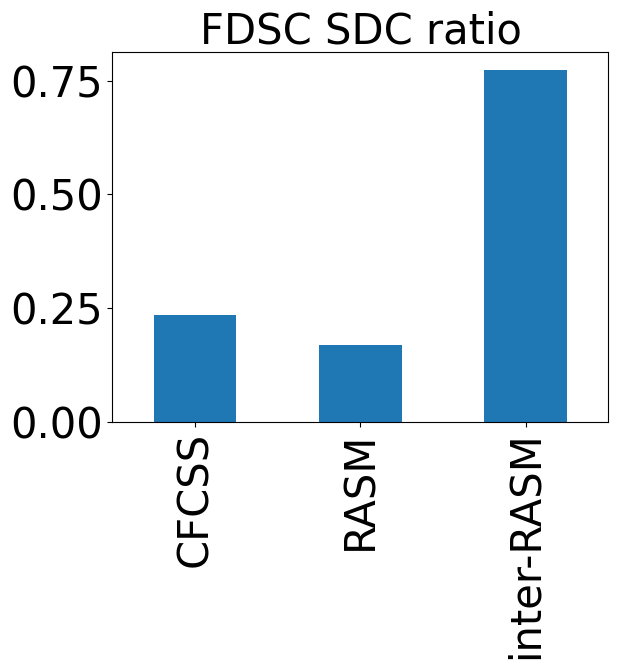

In [23]:
ax = df_perc.drop(['eddi_cfcss', 'eddi_rasm', 'eddi_rasm_inter',
              'seddi_cfcss', 'seddi_rasm', 'seddi_rasm_inter', 'nopass']).plot(y=[-2], kind="bar")
ax.set_title("FDSC SDC ratio", fontdict={'fontsize': 30})
ax.tick_params(axis='both', which='major', labelsize=30)
ax.get_legend().remove()
labels = ['CFCSS', 'RASM', 'inter-RASM']
ax.set_xticklabels(labels)
plt.savefig("figures/reg_fdsc_sdc.svg",bbox_inches = 'tight')

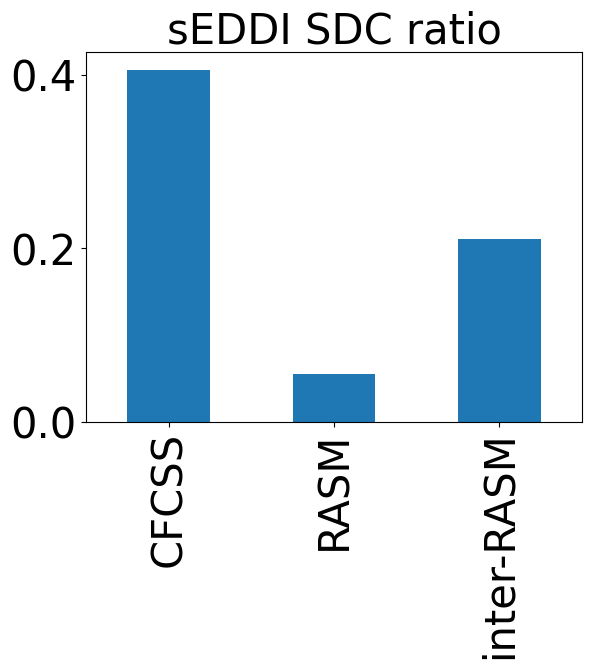

In [24]:
ax = df_perc.drop(['fdsc_cfcss', 'fdsc_rasm', 'fdsc_rasm_inter',
              'eddi_cfcss', 'eddi_rasm', 'eddi_rasm_inter', 'nopass']).plot(y=[-2], kind="bar")
ax.set_title("sEDDI SDC ratio", fontdict={'fontsize': 30})
ax.tick_params(axis='both', which='major', labelsize=30)
ax.get_legend().remove()
labels = ['CFCSS', 'RASM', 'inter-RASM']
ax.set_xticklabels(labels)
plt.savefig("figures/reg_seddi_sdc.svg",bbox_inches = 'tight')